In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from astropy.time import Time
from astropy.timeseries import TimeSeries, aggregate_downsample
import astropy.units as u


## path to file with NIRSpec Data
file_nirspec = 'jw03548003001_03101_00001-seg001_nrs1_x1dints.fits'

## use astropy module for reading fits file
hdu_n = fits.open(file_nirspec)

time_array = hdu_n[1].data.field('int_mid_BJD_TDB')
print(f"This is the list of times in days {time_array}")


This is the list of times in days [60148.79920059 60148.79922177 60148.79924295 ... 60148.92042627
 60148.92044745 60148.92046863]


In [2]:
## now let's read the spectra into an array
n_times = len(time_array)

n_wpts = 431 ## I just read this number from the earlier output.

## set up empty arrays for wavelength, flux and flux error:
w = np.zeros((n_wpts, n_times))
f = w * 0
fe = f * 0

for i in range(0, n_wpts):
    for j in range(2, n_times + 2):
        w[i, j - 2] = hdu_n[j].data[i][0]
        f[i, j - 2] = hdu_n[j].data[i][1]
        fe[i, j - 2] = hdu_n[j].data[i][2]
        
# Convert to units
wNewUnit = w
fNewUnit = 2.9979E+14 * (f) / (w) ** 2 * 1E-26
feNewUnit = 2.9979E+14 * (fe) / (w) ** 2 * 1E-26    

In [3]:
# Define wavelength range
wavelength_min = 1.15  # microns
wavelength_max = 1.25  # microns
J_lc = np.zeros(len(time_array)) 


# Extract flux values within the wavelength range
print(fNewUnit.shape)

for i in range(0,len(time_array)):
    wavelength_indices = np.where(np.logical_and(wNewUnit[:,i] >= wavelength_min, wNewUnit[:,i] <= wavelength_max))[0]
    flux_within_range = fNewUnit[wavelength_indices,i]
    J_lc[i] = np.median(flux_within_range)
    
### normalise the light curve to 1 
norm = np.median(J_lc)
J_lc = J_lc/ norm

(431, 5726)


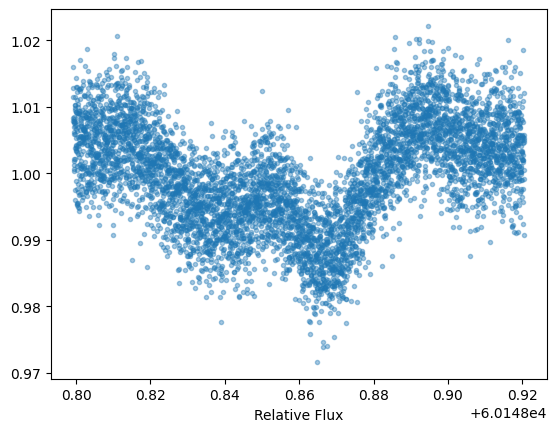

In [4]:
plt.plot(time_array,J_lc,marker='.',linestyle='None',alpha=0.4)
plt.xlabel("Time (BJD)")
plt.xlabel("Relative Flux")
plt.savefig("light_curve_raw.png")

In [5]:
# What is the cadence (difference between timestamps)

print((time_array[1] - time_array[0])*24*60*60)   # in seconds

cadence = (time_array[1] - time_array[0])*24*60   # in minutes
print(f"{cadence} min between flux measurements")

1.8301405711099505
0.03050234285183251 min between flux measurements


(5726,)
       time               flux       
------------------ ------------------
60148.799200587586  1.008283190274722
 60148.79922176977  1.012855355365053
60148.799242951965 1.0159179731796908
 60148.79926413416 1.0079024081354528
60148.799285316345 1.0114176402002155
 60148.79930649854  1.006972234160555
 60148.79932768073 1.0085076711594974
               ...                ...
 60148.92034154113 1.0120703965552507
 60148.92036272332 0.9992063756698801
 60148.92038390551   1.00057540619491
 60148.92040508771 0.9906838021438964
 60148.92042626989  1.004733361053311
 60148.92044745209 1.0050125407860593
 60148.92046863428 1.0053704766554385
Length = 5726 rows


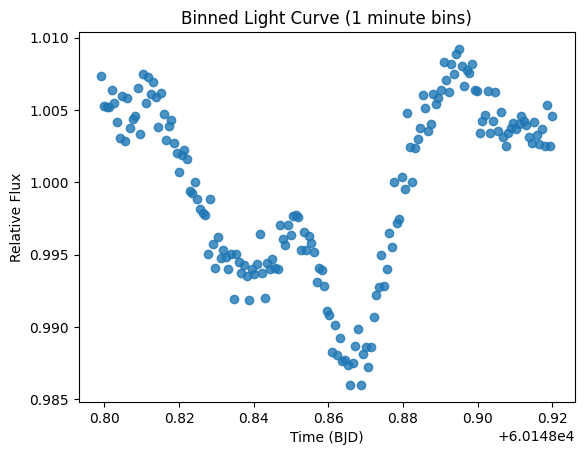

In [6]:
# Binning (condensing data to obtain a clearer visual trend)


# Convert time_array to astropy Time object
time = Time(time_array, format='mjd', scale='tdb')

print(time.shape)

# Create a TimeSeries object
ts = TimeSeries(time=time, data={'flux':J_lc})
print(ts)

# Define the binning duration in minutes
bin_width = 1  # minute

# Perform binning
binned_lc = aggregate_downsample(ts, time_bin_size=bin_width * u.minute, aggregate_func=np.median)

# Extract binned time and flux values
binned_time = binned_lc.time_bin_start.mjd
binned_flux = binned_lc['flux']

# Plot the binned light curve
plt.scatter(binned_time, binned_flux, marker='o', linestyle='-', alpha=0.8)
plt.xlabel("Time (BJD)")
plt.ylabel("Relative Flux")
plt.title("Binned Light Curve (1 minute bins)")
plt.savefig("binned_light_curve_1_min_.png")
plt.show()

0.0
(431, 5726)


/opt/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


       time        flux
------------------ ----
60148.799200587586  nan
 60148.79922176977  nan
60148.799242951965  nan
 60148.79926413416  nan
60148.799285316345  nan
 60148.79930649854  nan
 60148.79932768073  nan
               ...  ...
 60148.92034154113  nan
 60148.92036272332  nan
 60148.92038390551  nan
 60148.92040508771  nan
 60148.92042626989  nan
 60148.92044745209  nan
 60148.92046863428  nan
Length = 5726 rows


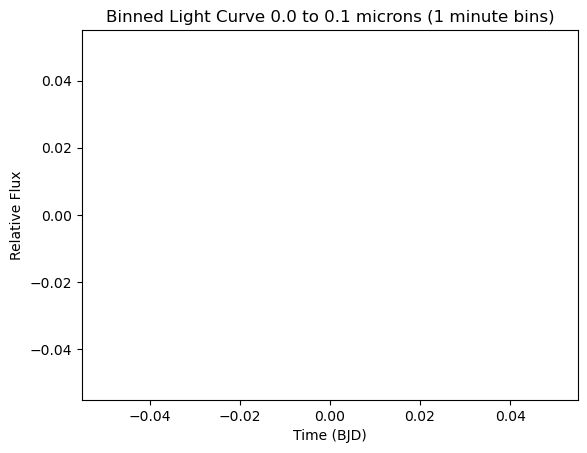

0.1
(431, 5726)
       time        flux
------------------ ----
60148.799200587586  nan
 60148.79922176977  nan
60148.799242951965  nan
 60148.79926413416  nan
60148.799285316345  nan
 60148.79930649854  nan
 60148.79932768073  nan
               ...  ...
 60148.92034154113  nan
 60148.92036272332  nan
 60148.92038390551  nan
 60148.92040508771  nan
 60148.92042626989  nan
 60148.92044745209  nan
 60148.92046863428  nan
Length = 5726 rows


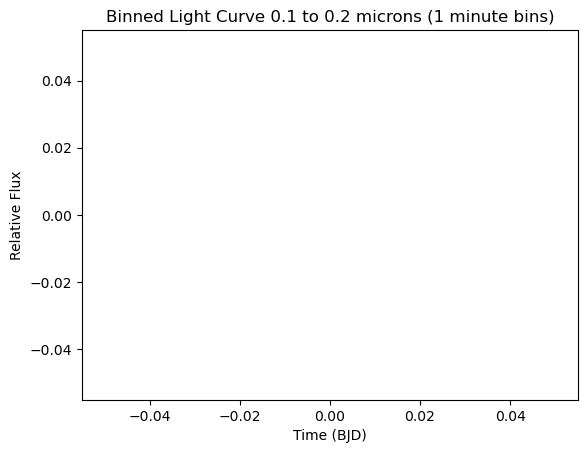

0.2
(431, 5726)
       time        flux
------------------ ----
60148.799200587586  nan
 60148.79922176977  nan
60148.799242951965  nan
 60148.79926413416  nan
60148.799285316345  nan
 60148.79930649854  nan
 60148.79932768073  nan
               ...  ...
 60148.92034154113  nan
 60148.92036272332  nan
 60148.92038390551  nan
 60148.92040508771  nan
 60148.92042626989  nan
 60148.92044745209  nan
 60148.92046863428  nan
Length = 5726 rows


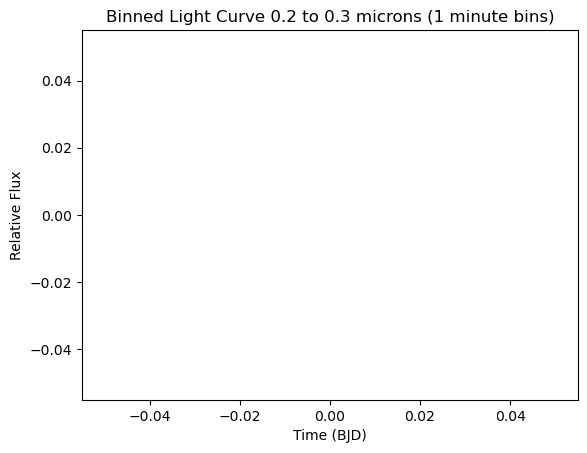

0.3
(431, 5726)
       time        flux
------------------ ----
60148.799200587586  nan
 60148.79922176977  nan
60148.799242951965  nan
 60148.79926413416  nan
60148.799285316345  nan
 60148.79930649854  nan
 60148.79932768073  nan
               ...  ...
 60148.92034154113  nan
 60148.92036272332  nan
 60148.92038390551  nan
 60148.92040508771  nan
 60148.92042626989  nan
 60148.92044745209  nan
 60148.92046863428  nan
Length = 5726 rows


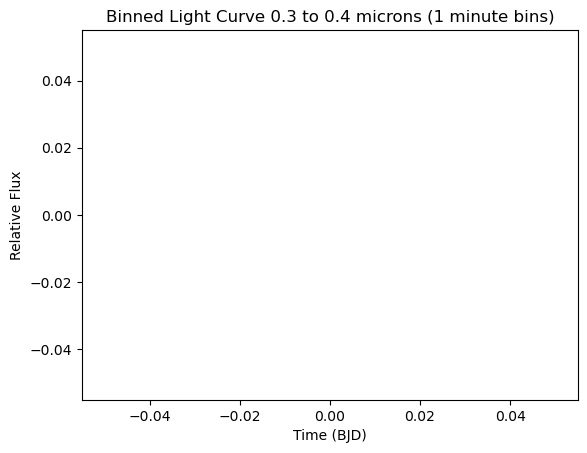

0.4
(431, 5726)
       time        flux
------------------ ----
60148.799200587586  nan
 60148.79922176977  nan
60148.799242951965  nan
 60148.79926413416  nan
60148.799285316345  nan
 60148.79930649854  nan
 60148.79932768073  nan
               ...  ...
 60148.92034154113  nan
 60148.92036272332  nan
 60148.92038390551  nan
 60148.92040508771  nan
 60148.92042626989  nan
 60148.92044745209  nan
 60148.92046863428  nan
Length = 5726 rows


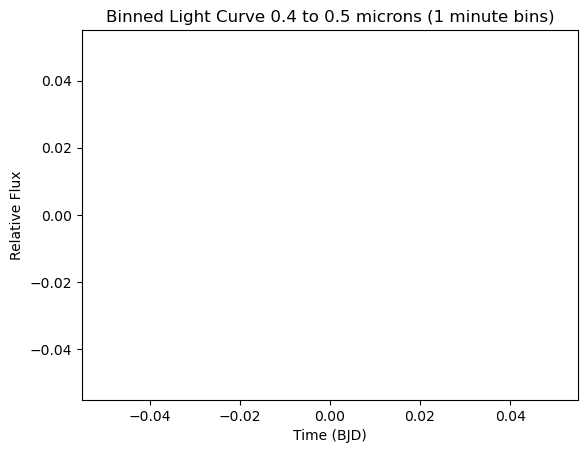

0.5
(431, 5726)
       time        flux
------------------ ----
60148.799200587586  nan
 60148.79922176977  nan
60148.799242951965  nan
 60148.79926413416  nan
60148.799285316345  nan
 60148.79930649854  nan
 60148.79932768073  nan
               ...  ...
 60148.92034154113  nan
 60148.92036272332  nan
 60148.92038390551  nan
 60148.92040508771  nan
 60148.92042626989  nan
 60148.92044745209  nan
 60148.92046863428  nan
Length = 5726 rows


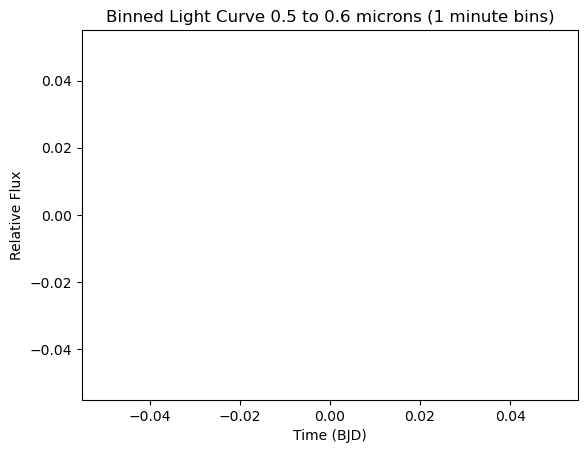

0.6
(431, 5726)
       time                flux        
------------------ --------------------
60148.799200587586 -0.36874632909054367
 60148.79922176977    2.221415600782644
60148.799242951965   1.1968570398724632
 60148.79926413416   -0.713015104370402
60148.799285316345   1.9264154529626163
 60148.79930649854   1.6642640593955997
 60148.79932768073   -4.925890735069471
               ...                  ...
 60148.92034154113   2.9744029822067857
 60148.92036272332   -4.102084291999016
 60148.92038390551                  0.0
 60148.92040508771   0.9078442347003689
 60148.92042626989    4.330445278792583
 60148.92044745209    1.634531285087806
 60148.92046863428                  0.0
Length = 5726 rows


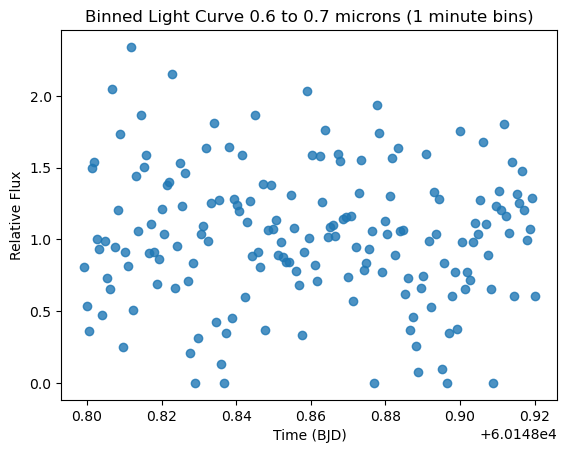

0.7
(431, 5726)
       time        flux
------------------ ----
60148.799200587586  nan
 60148.79922176977  nan
60148.799242951965  nan
 60148.79926413416  nan
60148.799285316345  nan
 60148.79930649854  nan
 60148.79932768073  nan
               ...  ...
 60148.92034154113  nan
 60148.92036272332  nan
 60148.92038390551  nan
 60148.92040508771  nan
 60148.92042626989  nan
 60148.92044745209  nan
 60148.92046863428  nan
Length = 5726 rows


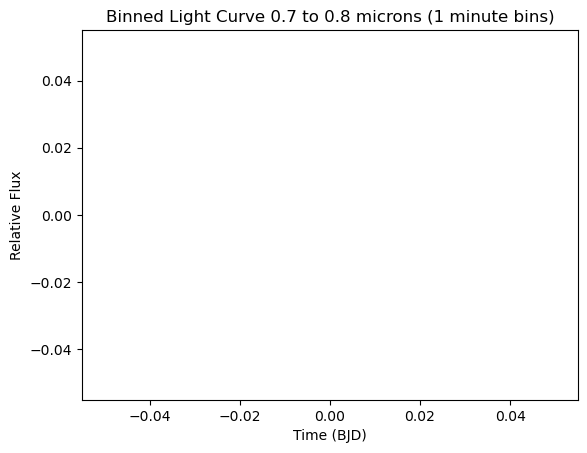

0.8
(431, 5726)
       time               flux       
------------------ ------------------
60148.799200587586 0.9969775111592015
 60148.79922176977 0.9549296891421298
60148.799242951965  1.010634315811084
 60148.79926413416 0.9301717988573185
60148.799285316345 1.0061737067557968
 60148.79930649854 0.9414870037511451
 60148.79932768073 0.9040959163834225
               ...                ...
 60148.92034154113 1.0710691108105075
 60148.92036272332 0.9965896557639586
 60148.92038390551 0.9786145944643146
 60148.92040508771 0.8940106567904921
 60148.92042626989 1.0470835587576248
 60148.92044745209  0.957645732372999
 60148.92046863428 1.0338938438904757
Length = 5726 rows


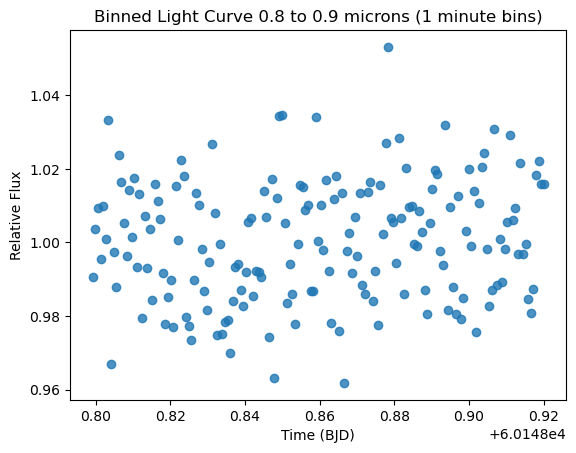

0.9
(431, 5726)
       time               flux       
------------------ ------------------
60148.799200587586 0.9837554379593922
 60148.79922176977 1.0064144870189673
60148.799242951965 1.0156749755841612
 60148.79926413416 0.9909762156761548
60148.799285316345  0.996676025307436
 60148.79930649854 1.0019233589958991
 60148.79932768073 1.0238787651498695
               ...                ...
 60148.92034154113  1.023775045086351
 60148.92036272332  0.984051633011036
 60148.92038390551  1.014044603429731
 60148.92040508771 0.9858057932960467
 60148.92042626989 1.0076816747530908
 60148.92044745209 1.0051103850424514
 60148.92046863428 0.9944569242392639
Length = 5726 rows


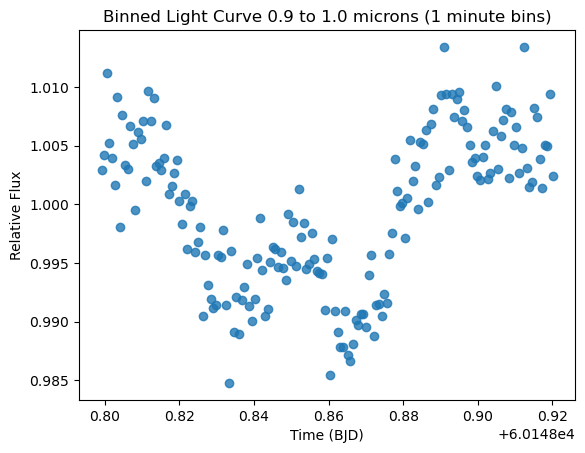

1.0
(431, 5726)
       time               flux       
------------------ ------------------
60148.799200587586 1.0066375656554016
 60148.79922176977 1.0052894074919272
60148.799242951965  1.003025823498336
 60148.79926413416 0.9981452884650118
60148.799285316345 1.0077486403191593
 60148.79930649854 1.0016152805386183
 60148.79932768073 1.0099444701532292
               ...                ...
 60148.92034154113 0.9996503437913341
 60148.92036272332 1.0081664801362757
 60148.92038390551  1.003979395720181
 60148.92040508771  1.001449471723508
 60148.92042626989 1.0086391619735442
 60148.92044745209 1.0040315650275737
 60148.92046863428 0.9891618793471213
Length = 5726 rows


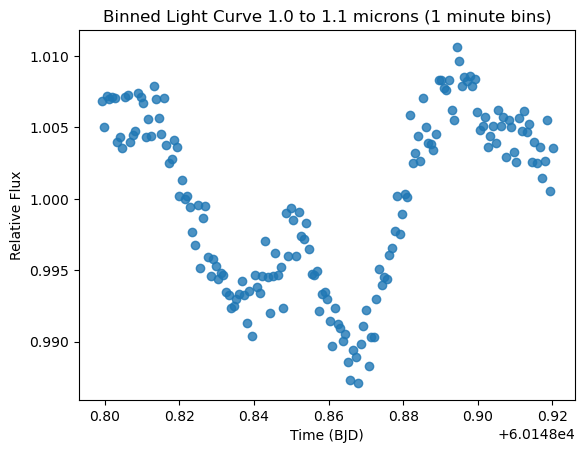

1.1
(431, 5726)
       time               flux       
------------------ ------------------
60148.799200587586 1.0048145116681801
 60148.79922176977 0.9985683889730863
60148.799242951965 1.0054277577607045
 60148.79926413416 0.9958076065614764
60148.799285316345 1.0037543729755658
 60148.79930649854 1.0063715375049525
 60148.79932768073 1.0103216153630596
               ...                ...
 60148.92034154113 0.9915354999580004
 60148.92036272332 1.0036251402748386
 60148.92038390551 0.9943648820518778
 60148.92040508771 0.9958384992472514
 60148.92042626989 1.0054986178183172
 60148.92044745209  1.012979820781571
 60148.92046863428 1.0025951998630354
Length = 5726 rows


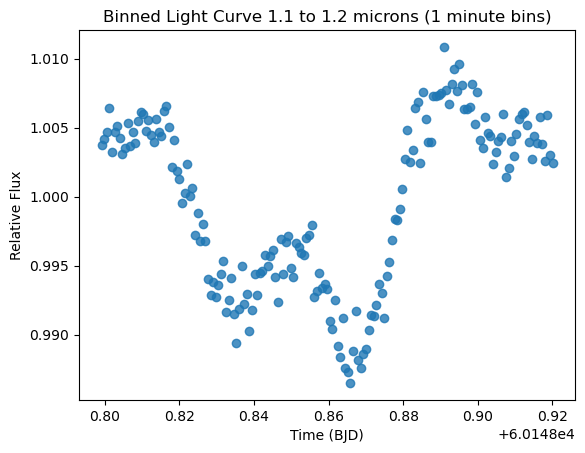

1.2
(431, 5726)
       time               flux       
------------------ ------------------
60148.799200587586  1.001599947811374
 60148.79922176977  1.003703539357196
60148.799242951965 1.0074832718839468
 60148.79926413416 1.0026937184193363
60148.799285316345 1.0079507175479203
 60148.79930649854  1.005337730714328
 60148.79932768073 1.0133478422043687
               ...                ...
 60148.92034154113  1.004850603324406
 60148.92036272332 0.9972087331575109
 60148.92038390551 0.9996628050995381
 60148.92040508771 0.9999960142604993
 60148.92042626989 1.0030933574720111
 60148.92044745209 1.0095154271899969
 60148.92046863428  0.995122835399558
Length = 5726 rows


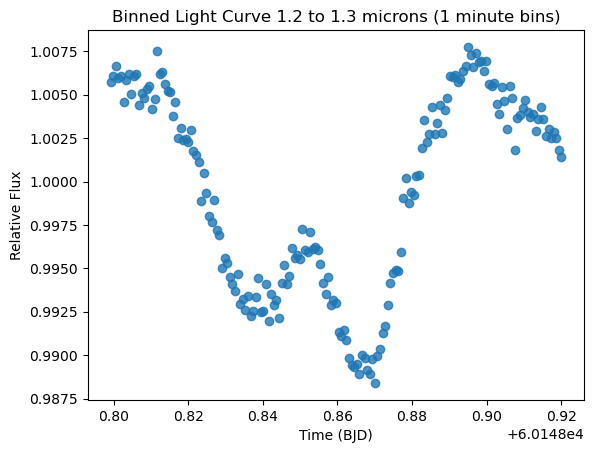

1.3
(431, 5726)
       time               flux       
------------------ ------------------
60148.799200587586 0.9984655892064772
 60148.79922176977 1.0188674498008172
60148.799242951965 1.0196225538753063
 60148.79926413416 1.0077850785644753
60148.799285316345  1.011118641766602
 60148.79930649854 1.0161435000839394
 60148.79932768073  1.014185442701224
               ...                ...
 60148.92034154113 1.0154631655712565
 60148.92036272332 0.9919944534356148
 60148.92038390551 0.9984093019270327
 60148.92040508771 0.9792802499326547
 60148.92042626989 0.9898713495967358
 60148.92044745209 1.0219999074801451
 60148.92046863428 0.9963573022804483
Length = 5726 rows


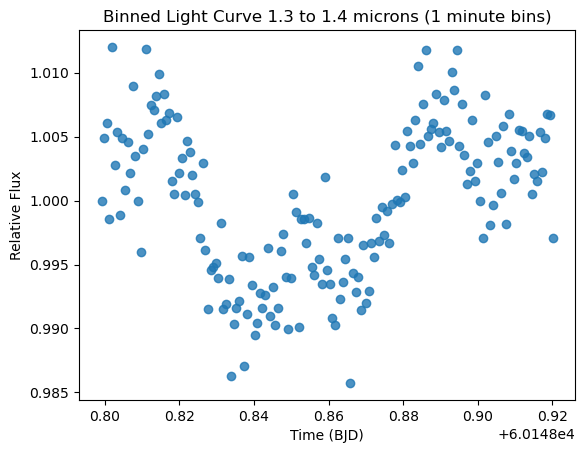

1.4
(431, 5726)
       time               flux       
------------------ ------------------
60148.799200587586 1.0016748601481884
 60148.79922176977 1.0083209071504975
60148.799242951965 0.9919950752772217
 60148.79926413416 0.9961834573503529
60148.799285316345  1.011511044607295
 60148.79930649854 0.9933640192033111
 60148.79932768073 0.9983257806680174
               ...                ...
 60148.92034154113 1.0081233372653535
 60148.92036272332 0.9961164301807057
 60148.92038390551 0.9919869848194642
 60148.92040508771 1.0025729377173986
 60148.92042626989 1.0161299730776754
 60148.92044745209  1.010530586010167
 60148.92046863428  1.000641687985461
Length = 5726 rows


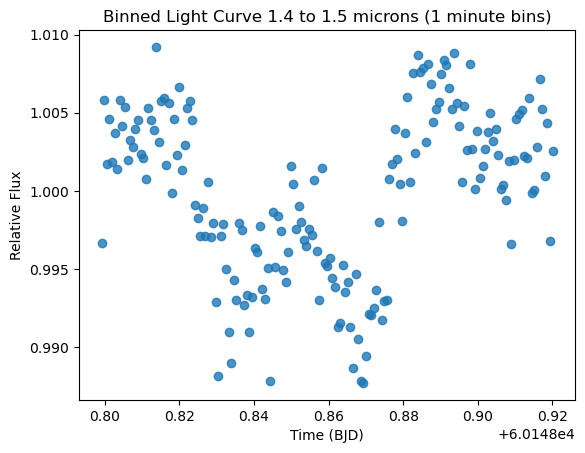

1.5
(431, 5726)
       time               flux       
------------------ ------------------
60148.799200587586 1.0151387770513194
 60148.79922176977 1.0045746073890076
60148.799242951965  1.012732199886177
 60148.79926413416 1.0024193569483124
60148.799285316345  1.008384608771145
 60148.79930649854 1.0097642663920636
 60148.79932768073  1.005704873580211
               ...                ...
 60148.92034154113 0.9990343300692234
 60148.92036272332 1.0103590594299034
 60148.92038390551  0.988326004007491
 60148.92040508771 1.0111560700944668
 60148.92042626989  1.003093928814246
 60148.92044745209 1.0039045111903089
 60148.92046863428  0.992257308772943
Length = 5726 rows


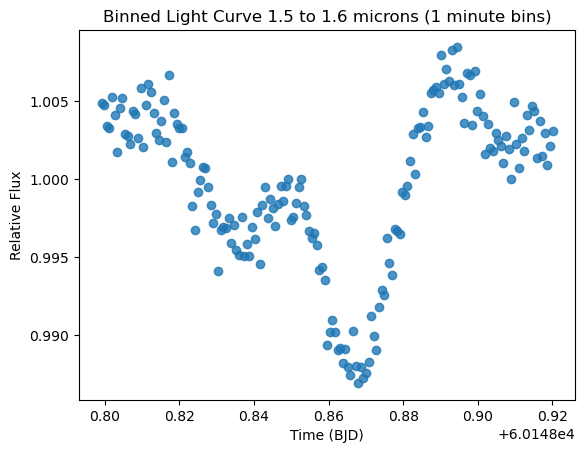

1.6
(431, 5726)
       time               flux       
------------------ ------------------
60148.799200587586 1.0000355237994445
 60148.79922176977 1.0108134476946082
60148.799242951965 1.0132308414608824
 60148.79926413416 0.9978518719179664
60148.799285316345  1.008819305066145
 60148.79930649854  1.001360475852925
 60148.79932768073 1.0077177804208253
               ...                ...
 60148.92034154113 1.0048275177284585
 60148.92036272332 0.9915285868895078
 60148.92038390551  1.009913810617375
 60148.92040508771 0.9968335421247264
 60148.92042626989 1.0002115937389522
 60148.92044745209 1.0067193282367786
 60148.92046863428 1.0138697307064939
Length = 5726 rows


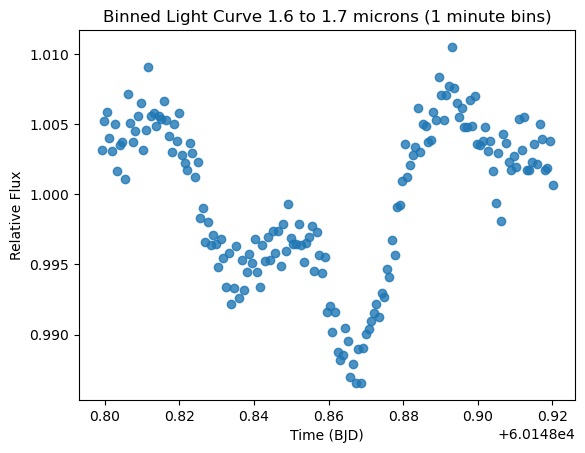

1.7
(431, 5726)
       time               flux       
------------------ ------------------
60148.799200587586 0.9987123989218895
 60148.79922176977 1.0053829043472824
60148.799242951965 1.0143317011117543
 60148.79926413416 0.9926074222218743
60148.799285316345  0.985047034148392
 60148.79930649854 1.0035312265990601
 60148.79932768073  1.008875915659785
               ...                ...
 60148.92034154113 0.9828538586188457
 60148.92036272332 0.9898904439265664
 60148.92038390551 0.9956325595283403
 60148.92040508771 1.0027316860510225
 60148.92042626989 0.9942429100013195
 60148.92044745209 1.0234741994623646
 60148.92046863428 1.0000386291038343
Length = 5726 rows


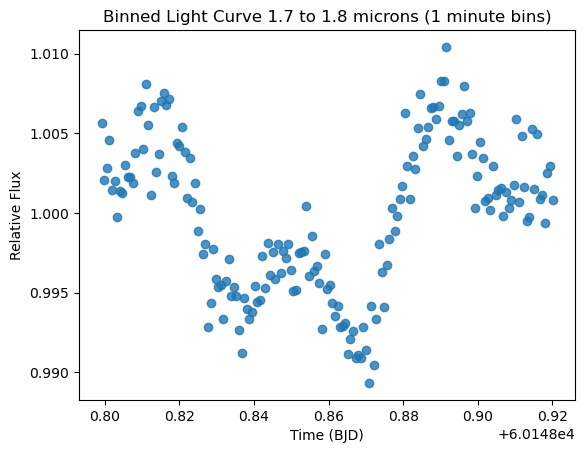

1.8
(431, 5726)
       time               flux       
------------------ ------------------
60148.799200587586 1.0092867841496722
 60148.79922176977 1.0151417940826248
60148.799242951965  1.011243059700536
 60148.79926413416 0.9976890526971498
60148.799285316345  1.014862526739811
 60148.79930649854 1.0031074280815506
 60148.79932768073 0.9886793891796682
               ...                ...
 60148.92034154113 0.9974250371207284
 60148.92036272332 0.9955714957892681
 60148.92038390551 1.0013399128490459
 60148.92040508771  0.966820694165972
 60148.92042626989 0.9874375314666228
 60148.92044745209  1.010290176936854
 60148.92046863428 0.9911034931684359
Length = 5726 rows


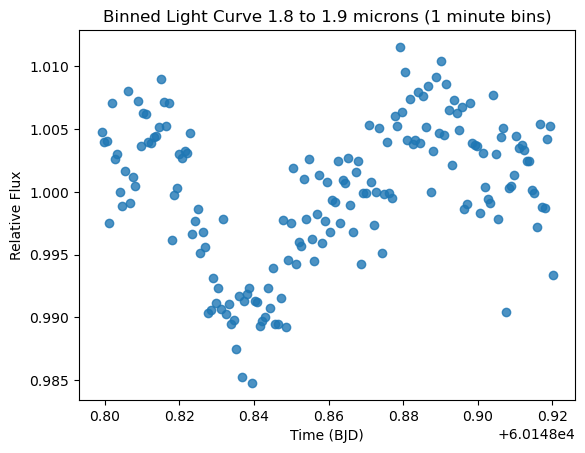

1.9
(431, 5726)
       time               flux       
------------------ ------------------
60148.799200587586 0.9963851197351467
 60148.79922176977 1.0177094620143048
60148.799242951965 0.9996783831857354
 60148.79926413416   1.00883402069283
60148.799285316345 1.0092256292407265
 60148.79930649854  1.016036598462158
 60148.79932768073 0.9950488297969524
               ...                ...
 60148.92034154113 1.0158806444468804
 60148.92036272332 0.9853357494631579
 60148.92038390551 1.0033714366971613
 60148.92040508771 0.9933972517501156
 60148.92042626989 1.0116057305750366
 60148.92044745209 1.0069321967399247
 60148.92046863428 0.9906384624594055
Length = 5726 rows


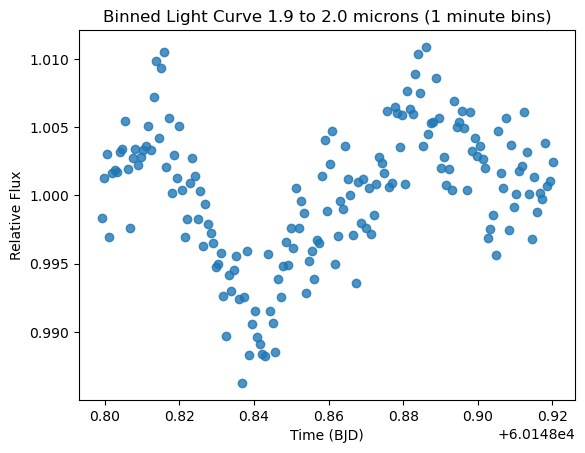

2.0
(431, 5726)
       time               flux       
------------------ ------------------
60148.799200587586 1.0085709893760963
 60148.79922176977 1.0110369862134616
60148.799242951965 1.0097049716597866
 60148.79926413416 0.9971403389457383
60148.799285316345  0.999198098548423
 60148.79930649854 0.9926355541472405
 60148.79932768073 1.0029113832489807
               ...                ...
 60148.92034154113 1.0042344751816918
 60148.92036272332 0.9970671664408237
 60148.92038390551 0.9876199606983951
 60148.92040508771 0.9935115067011867
 60148.92042626989 1.0069565145216635
 60148.92044745209 1.0159358356915549
 60148.92046863428 0.9934835490687972
Length = 5726 rows


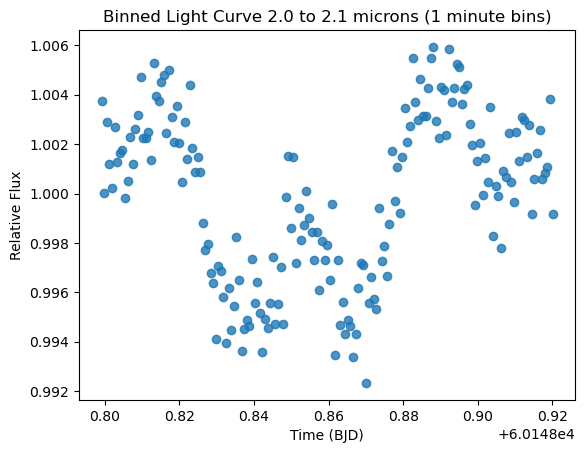

2.1
(431, 5726)
       time               flux       
------------------ ------------------
60148.799200587586 1.0053920247015176
 60148.79922176977 1.0068306102149114
60148.799242951965 1.0055126078434695
 60148.79926413416 1.0020253183736934
60148.799285316345 1.0041702090386675
 60148.79930649854 1.0104393197282633
 60148.79932768073 0.9955737541633073
               ...                ...
 60148.92034154113 1.0116077458022832
 60148.92036272332  0.999024808842666
 60148.92038390551 1.0093500423356563
 60148.92040508771 1.0041907527606706
 60148.92042626989  1.002594412738997
 60148.92044745209 0.9973177526726692
 60148.92046863428  0.998825284219173
Length = 5726 rows


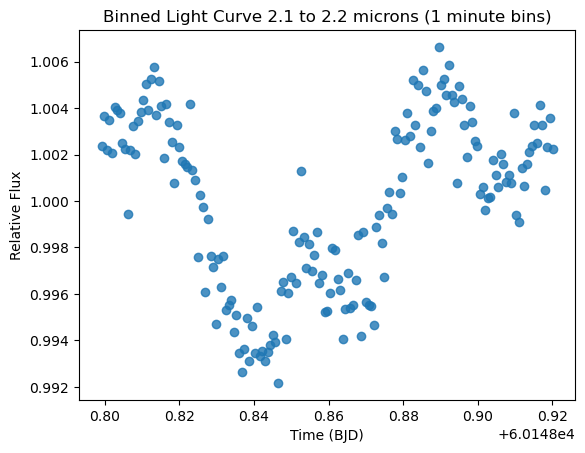

2.2
(431, 5726)
       time               flux       
------------------ ------------------
60148.799200587586 1.0025583267512967
 60148.79922176977 1.0103254617909225
60148.799242951965 0.9997697596678764
 60148.79926413416   1.00533925215988
60148.799285316345 1.0163372649698024
 60148.79930649854 0.9928890026668842
 60148.79932768073 0.9942883319636868
               ...                ...
 60148.92034154113 0.9996901597404803
 60148.92036272332 0.9979487117408801
 60148.92038390551 0.9947868354749354
 60148.92040508771 0.9989784402075909
 60148.92042626989  1.000571393417053
 60148.92044745209  1.022539425614212
 60148.92046863428 0.9959592087820829
Length = 5726 rows


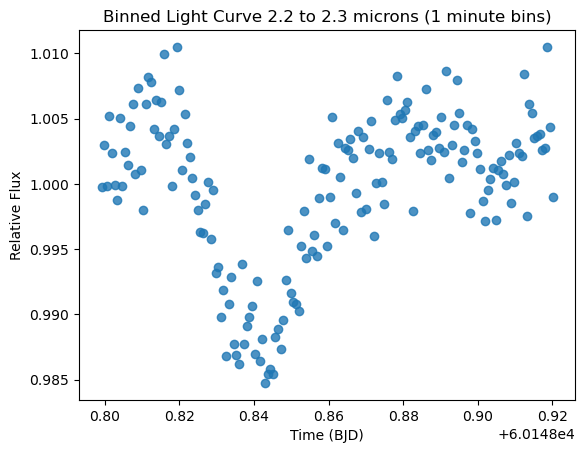

2.3
(431, 5726)
       time               flux       
------------------ ------------------
60148.799200587586 0.9879849829500231
 60148.79922176977 1.0267772930027657
60148.799242951965 1.0045040935945506
 60148.79926413416 0.9860096426548773
60148.799285316345 0.9884437221482884
 60148.79930649854 1.0168346037121043
 60148.79932768073 0.9967444310855669
               ...                ...
 60148.92034154113 1.0126781519755916
 60148.92036272332 1.0045325714194306
 60148.92038390551 1.0081441338350516
 60148.92040508771 0.9952953219945248
 60148.92042626989 0.9974041678611273
 60148.92044745209 0.9907740231389359
 60148.92046863428  0.994398594350049
Length = 5726 rows


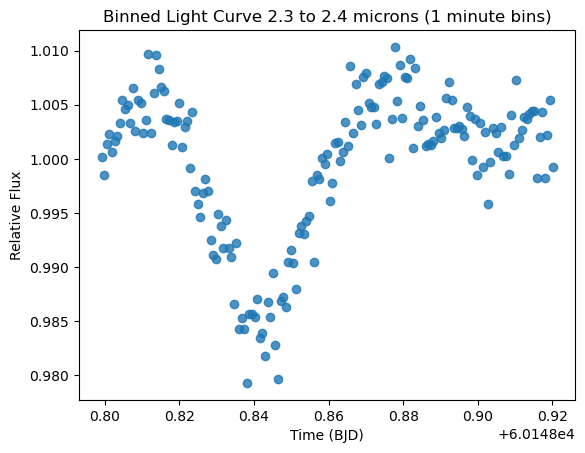

2.4
(431, 5726)
       time               flux       
------------------ ------------------
60148.799200587586 1.0072615063488912
 60148.79922176977  1.004296815098025
60148.799242951965 0.9953348644126836
 60148.79926413416 0.9978665560541983
60148.799285316345 0.9967357883626768
 60148.79930649854 0.9957534429191329
 60148.79932768073 0.9889600690579321
               ...                ...
 60148.92034154113 0.9798417304117013
 60148.92036272332 1.0285411696519362
 60148.92038390551 1.0263457455405558
 60148.92040508771 1.0030557090466428
 60148.92042626989 0.9983174746779192
 60148.92044745209 0.9982195761441558
 60148.92046863428 0.9871571435721119
Length = 5726 rows


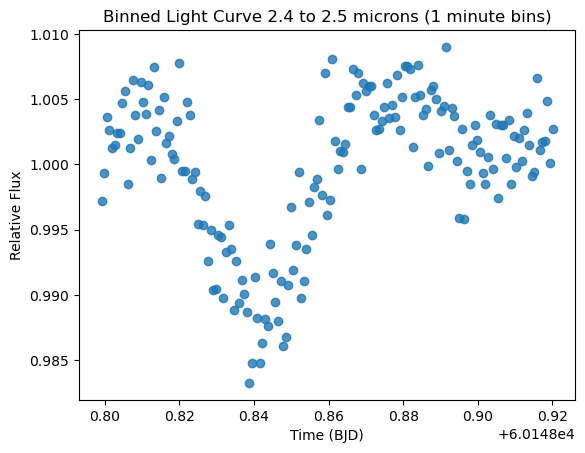

2.5
(431, 5726)
       time               flux       
------------------ ------------------
60148.799200587586 0.9963155903213281
 60148.79922176977 1.0145565545352213
60148.799242951965 1.0064062332657915
 60148.79926413416 1.0134158519861256
60148.799285316345 0.9689414009425327
 60148.79930649854   1.01121124208323
 60148.79932768073 0.9786757264182817
               ...                ...
 60148.92034154113  0.987463721927982
 60148.92036272332 0.9961589680607587
 60148.92038390551  1.007870508529182
 60148.92040508771   1.00641039405396
 60148.92042626989 1.0000944564541419
 60148.92044745209 0.9972519164536023
 60148.92046863428  0.985187662008062
Length = 5726 rows


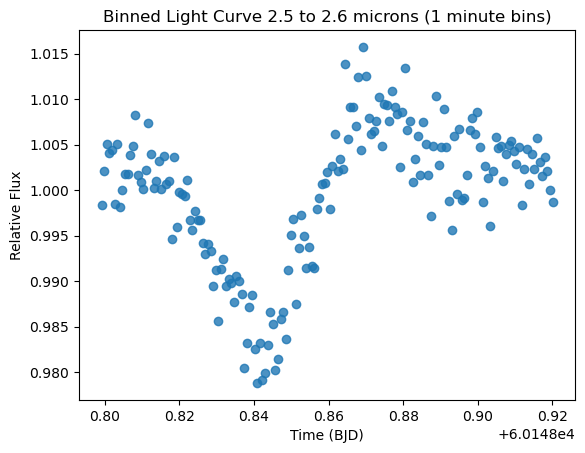

2.6
(431, 5726)
       time               flux       
------------------ ------------------
60148.799200587586 0.9945802863993712
 60148.79922176977 1.0179585655266403
60148.799242951965 1.0154358441590288
 60148.79926413416  0.980616789546301
60148.799285316345  0.986088576645247
 60148.79930649854 1.0015649770959556
 60148.79932768073   0.98798823710864
               ...                ...
 60148.92034154113 1.0134735042647536
 60148.92036272332 0.9945265638208686
 60148.92038390551 0.9988385166793669
 60148.92040508771 0.9755763065708989
 60148.92042626989 1.0021894305686136
 60148.92044745209 1.0012046833081358
 60148.92046863428  1.007998497317434
Length = 5726 rows


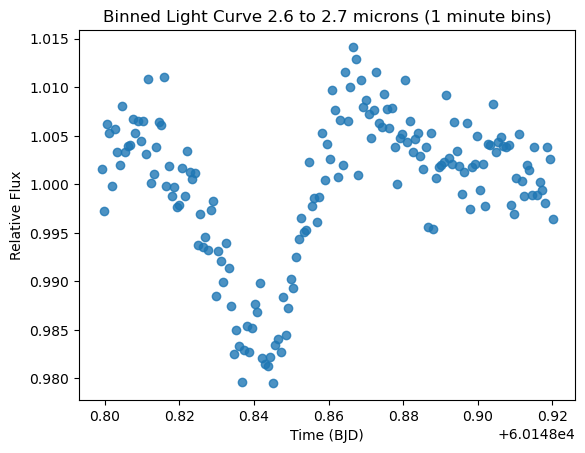

2.7
(431, 5726)
       time               flux       
------------------ ------------------
60148.799200587586 1.0184196544175264
 60148.79922176977 0.9934911023613331
60148.799242951965 1.0064199762140644
 60148.79926413416  0.989083342170068
60148.799285316345 0.9893052410492246
 60148.79930649854   1.03964906331978
 60148.79932768073 0.9917584693153579
               ...                ...
 60148.92034154113 1.0178439821981895
 60148.92036272332 0.9996145622856062
 60148.92038390551 1.0124059184144298
 60148.92040508771  0.997821616787422
 60148.92042626989 1.0100024705628619
 60148.92044745209 0.9868383678647304
 60148.92046863428 1.0218999434871927
Length = 5726 rows


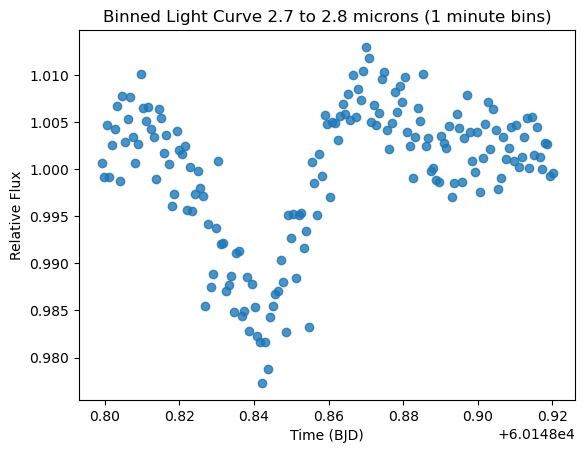

2.8
(431, 5726)
       time               flux       
------------------ ------------------
60148.799200587586 0.9997675951779578
 60148.79922176977 1.0203417632965555
60148.799242951965 0.9918093883116901
 60148.79926413416 0.9682501893729875
60148.799285316345 1.0140534370595058
 60148.79930649854 0.9955369105550037
 60148.79932768073 0.9870960398544544
               ...                ...
 60148.92034154113 1.0134800442182377
 60148.92036272332 0.9997777493691338
 60148.92038390551 0.9915049684182047
 60148.92040508771 0.9906243895729564
 60148.92042626989 0.9983587962661427
 60148.92044745209 1.0023881898498515
 60148.92046863428 0.9875656121005503
Length = 5726 rows


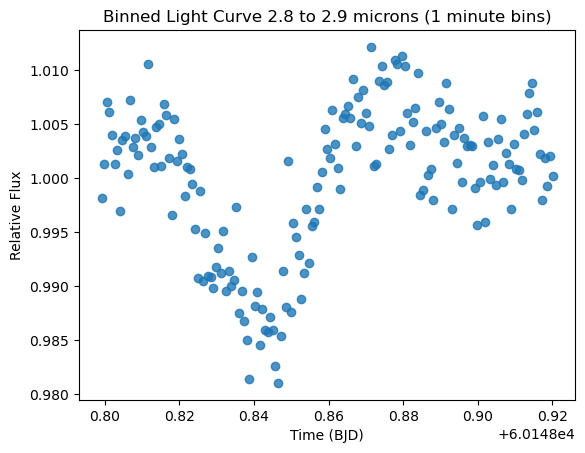

2.9
(431, 5726)
       time               flux       
------------------ ------------------
60148.799200587586 1.0050176290735944
 60148.79922176977 1.0046604952219764
60148.799242951965  1.002690909630245
 60148.79926413416 0.9903253820972794
60148.799285316345 1.0168907514551937
 60148.79930649854 1.0096971488356434
 60148.79932768073 1.0097284730810376
               ...                ...
 60148.92034154113 0.9860702801906163
 60148.92036272332 0.9953855055083785
 60148.92038390551  1.030593894325875
 60148.92040508771 1.0028173732138193
 60148.92042626989 1.0163773528376772
 60148.92044745209  0.993964717209595
 60148.92046863428 1.0096819085899762
Length = 5726 rows


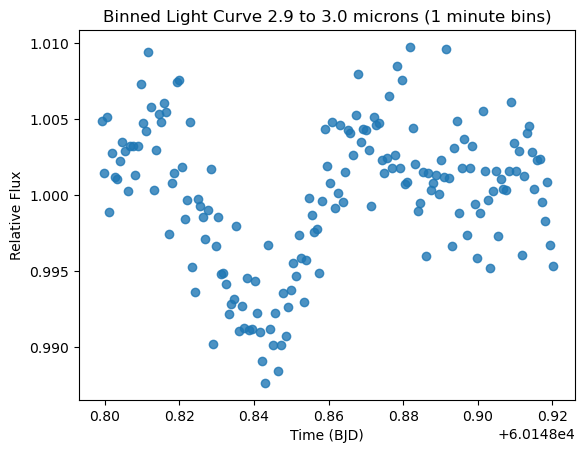

3.0
(431, 5726)
       time               flux       
------------------ ------------------
60148.799200587586 1.0068489011310133
 60148.79922176977  1.016983697093622
60148.799242951965 0.9962187138038064
 60148.79926413416 0.9905310399502176
60148.799285316345 0.9989278232063792
 60148.79930649854  1.013805320276022
 60148.79932768073 1.0017736861454145
               ...                ...
 60148.92034154113  1.007758489098245
 60148.92036272332 1.0066182314008139
 60148.92038390551 1.0232825160821137
 60148.92040508771  0.988571846168898
 60148.92042626989 1.0188315458900574
 60148.92044745209 1.0036921905233471
 60148.92046863428 0.9856397108381428
Length = 5726 rows


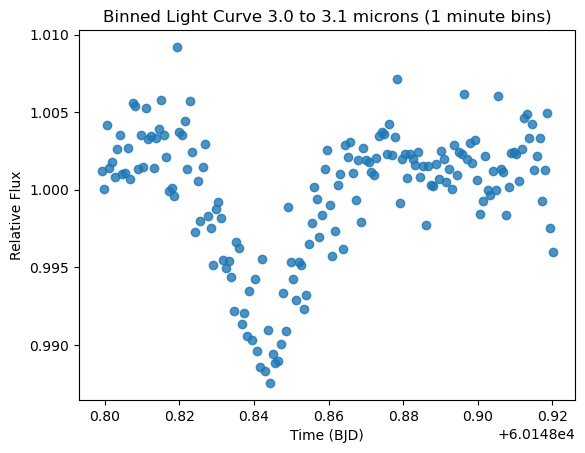

3.1
(431, 5726)
       time               flux       
------------------ ------------------
60148.799200587586  1.029308118567721
 60148.79922176977 1.0188182070082137
60148.799242951965 0.9812704776731542
 60148.79926413416 0.9620950523607553
60148.799285316345 1.0170520928412876
 60148.79930649854 1.0176197676104906
 60148.79932768073 0.9965797280773129
               ...                ...
 60148.92034154113 0.9980912130964128
 60148.92036272332 1.0164490202787326
 60148.92038390551 0.9979166275897247
 60148.92040508771 0.9780378195316989
 60148.92042626989  1.020342672355404
 60148.92044745209 1.0124009415914141
 60148.92046863428 0.9979184212344964
Length = 5726 rows


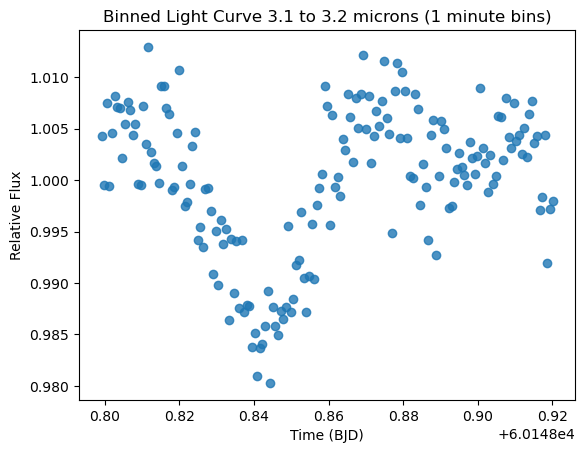

3.2
(431, 5726)
       time               flux       
------------------ ------------------
60148.799200587586 0.9988291082934176
 60148.79922176977  1.009190536920893
60148.799242951965 1.0073319253342272
 60148.79926413416 0.9566770935317298
60148.799285316345  0.991166436028207
 60148.79930649854 1.0120793957404242
 60148.79932768073 1.0065097808408607
               ...                ...
 60148.92034154113 0.9994075665137078
 60148.92036272332  1.014413212751292
 60148.92038390551 1.0041461197170332
 60148.92040508771 0.9616084700044567
 60148.92042626989 1.0292043056484212
 60148.92044745209 0.9777798099581478
 60148.92046863428  1.005872130399651
Length = 5726 rows


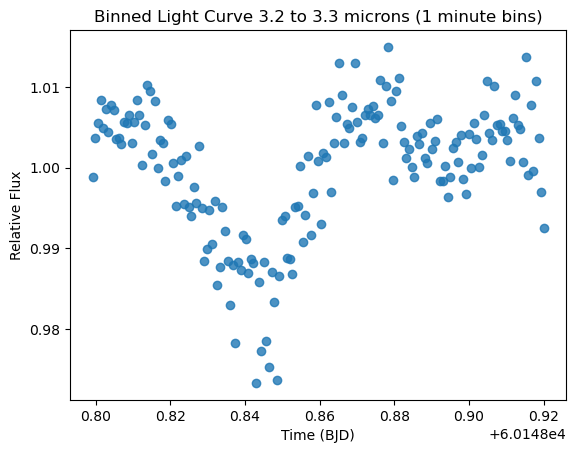

3.3
(431, 5726)
       time               flux       
------------------ ------------------
60148.799200587586 1.0024546443549112
 60148.79922176977 0.9810058822767997
60148.799242951965 1.0488925402018057
 60148.79926413416 0.9737240597794605
60148.799285316345 1.0297087416595947
 60148.79930649854  1.014112415842919
 60148.79932768073 0.9830659345230853
               ...                ...
 60148.92034154113 1.0082173310984703
 60148.92036272332 1.0378086636082602
 60148.92038390551 0.9808492310571678
 60148.92040508771 0.9966659471117788
 60148.92042626989 1.0084178679141589
 60148.92044745209 0.9874243032949681
 60148.92046863428 1.0247847753552748
Length = 5726 rows


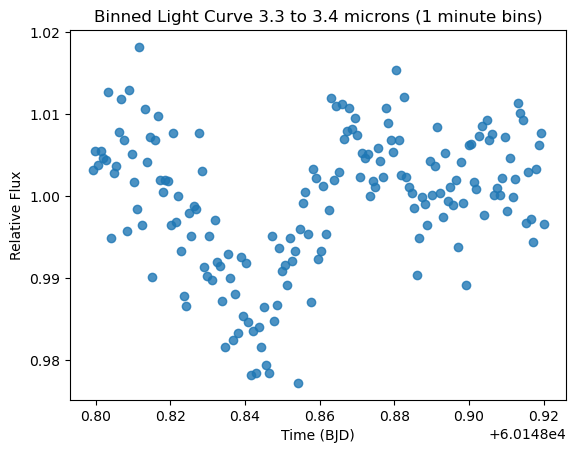

3.4
(431, 5726)
       time               flux       
------------------ ------------------
60148.799200587586 1.0180146700290473
 60148.79922176977  1.003249582093507
60148.799242951965 0.9978360412579995
 60148.79926413416  0.979810428138453
60148.799285316345 0.9917967844994743
 60148.79930649854 1.0077561778216058
 60148.79932768073  0.989050741700108
               ...                ...
 60148.92034154113 0.9945743114364857
 60148.92036272332 1.0077687893605658
 60148.92038390551 1.0083224669995956
 60148.92040508771 0.9808760575295349
 60148.92042626989 1.0290995464187747
 60148.92044745209  1.017244395631702
 60148.92046863428 1.0017631991904852
Length = 5726 rows


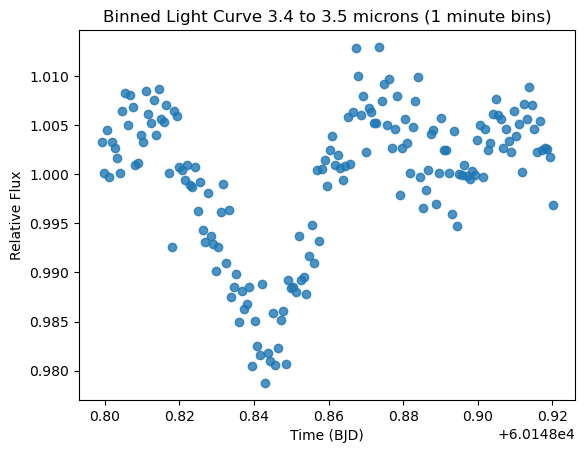

3.5
(431, 5726)
       time               flux       
------------------ ------------------
60148.799200587586 1.0064979632007516
 60148.79922176977 1.0024948026116798
60148.799242951965  0.982105122395423
 60148.79926413416 0.9778887164372835
60148.799285316345 1.0119235873765215
 60148.79930649854 1.0255369697906171
 60148.79932768073 0.9851173349356485
               ...                ...
 60148.92034154113 1.0005404001285159
 60148.92036272332  1.030096570564409
 60148.92038390551 0.9880167146861458
 60148.92040508771 0.9983546182218617
 60148.92042626989 1.0306288769511773
 60148.92044745209 1.0182472550344175
 60148.92046863428 1.0049375065078825
Length = 5726 rows


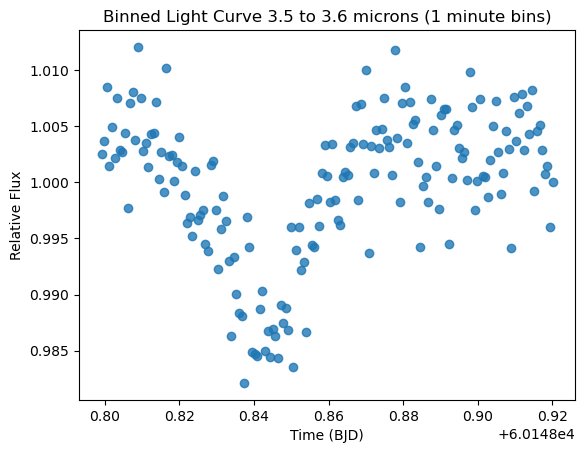

3.6
(431, 5726)
       time               flux       
------------------ ------------------
60148.799200587586 1.0083783125483132
 60148.79922176977  0.986612430489266
60148.799242951965 1.0158979661059468
 60148.79926413416 0.9998038501929132
60148.799285316345 0.9726512575381374
 60148.79930649854 1.0129610625515353
 60148.79932768073 1.0052186527284486
               ...                ...
 60148.92034154113 0.9945560838847691
 60148.92036272332 0.9979554329665519
 60148.92038390551 0.9935749484194143
 60148.92040508771 1.0030788766028935
 60148.92042626989 0.9984944168323053
 60148.92044745209 1.0014911598182443
 60148.92046863428 0.9884509600768449
Length = 5726 rows


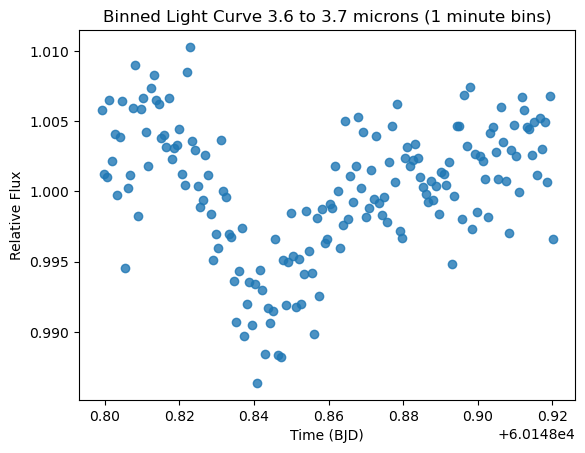

3.7
(431, 5726)
       time               flux       
------------------ ------------------
60148.799200587586 1.0084321116423904
 60148.79922176977 0.9939860778255362
60148.799242951965 1.0015038148439843
 60148.79926413416 0.9923504741823099
60148.799285316345 0.9851099343476224
 60148.79930649854  1.007756461467814
 60148.79932768073 0.9999487139324335
               ...                ...
 60148.92034154113 1.0041157746484994
 60148.92036272332 0.9973982675020848
 60148.92038390551 0.9944139098499732
 60148.92040508771  0.993432499060442
 60148.92042626989 1.0066188556714393
 60148.92044745209 0.9985845288761782
 60148.92046863428 0.9996699210591545
Length = 5726 rows


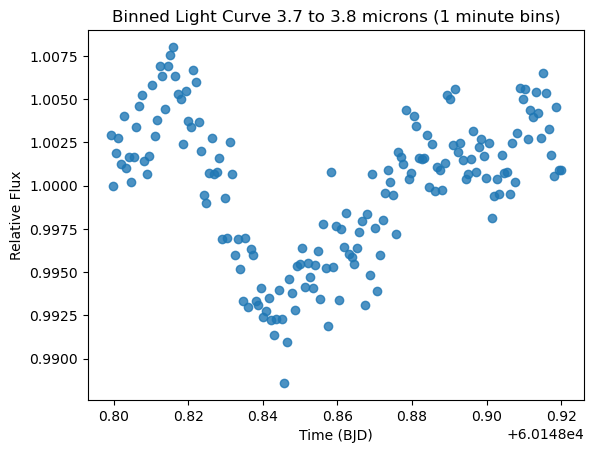

3.8
(431, 5726)
       time               flux       
------------------ ------------------
60148.799200587586 1.0047160770373502
 60148.79922176977 0.9958821776496114
60148.799242951965 1.0010280984535087
 60148.79926413416 0.9989789676218709
60148.799285316345  0.989886471489638
 60148.79930649854 0.9979192728272589
 60148.79932768073  1.004717904016319
               ...                ...
 60148.92034154113 1.0011762811879032
 60148.92036272332 1.0005236712946732
 60148.92038390551 0.9954619886860833
 60148.92040508771 1.0012976100924378
 60148.92042626989 1.0224978617165796
 60148.92044745209  1.004236567223279
 60148.92046863428 0.9944436186398836
Length = 5726 rows


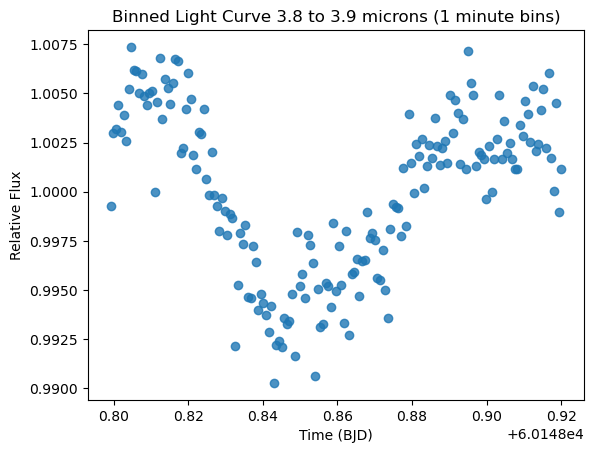

3.9
(431, 5726)
       time               flux       
------------------ ------------------
60148.799200587586 1.0108014184944203
 60148.79922176977 0.9983977054404506
60148.799242951965 1.0128052328984538
 60148.79926413416 1.0076951627080222
60148.799285316345 0.9987226313094915
 60148.79930649854 1.0072160985395124
 60148.79932768073 0.9941120609499261
               ...                ...
 60148.92034154113 1.0042378706025612
 60148.92036272332 0.9944645851154117
 60148.92038390551 1.0049929809284182
 60148.92040508771 1.0008608781912287
 60148.92042626989 1.0051773133420792
 60148.92044745209   1.00069287802398
 60148.92046863428 0.9982305910916649
Length = 5726 rows


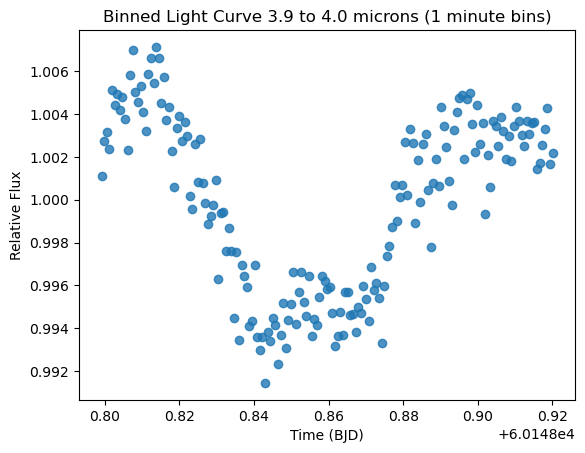

4.0
(431, 5726)
       time               flux       
------------------ ------------------
60148.799200587586 1.0194895267776332
 60148.79922176977 1.0062072386242549
60148.799242951965 1.0098605881018599
 60148.79926413416 1.0015495119959341
60148.799285316345 0.9997549008913597
 60148.79930649854 1.0051804020348432
 60148.79932768073 0.9923246410130316
               ...                ...
 60148.92034154113 1.0007258759155782
 60148.92036272332 0.9974520105966396
 60148.92038390551 1.0043555393420507
 60148.92040508771 0.9991800448754644
 60148.92042626989  1.005473581262884
 60148.92044745209 0.9889683099982568
 60148.92046863428 1.0074373911356902
Length = 5726 rows


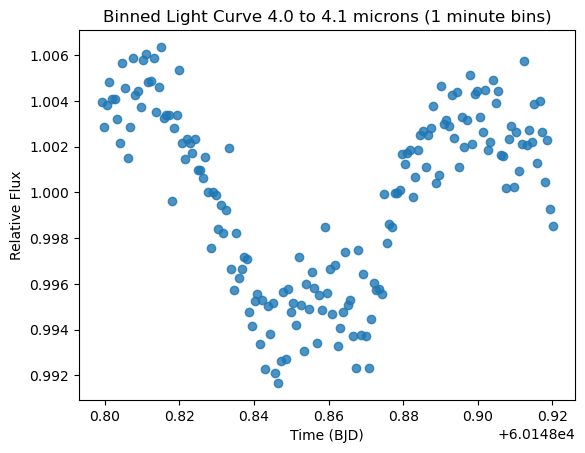

4.1
(431, 5726)
       time               flux       
------------------ ------------------
60148.799200587586 1.0274478248882009
 60148.79922176977 0.9928954426669186
60148.799242951965 0.9810958987837584
 60148.79926413416 0.9947969898986383
60148.799285316345 0.9978312240076176
 60148.79930649854   1.01126030282715
 60148.79932768073 0.9952574636452817
               ...                ...
 60148.92034154113 1.0098570428169003
 60148.92036272332 0.9913256455655648
 60148.92038390551 0.9957491268027908
 60148.92040508771 0.9745737521136449
 60148.92042626989 1.0141964477132959
 60148.92044745209 0.9953494296039355
 60148.92046863428 0.9988535290011312
Length = 5726 rows


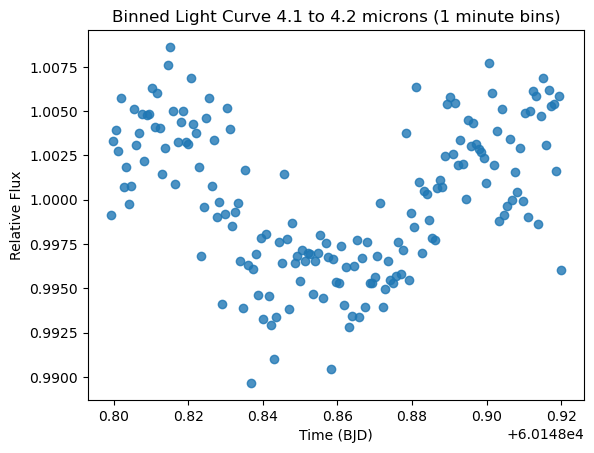

4.2
(431, 5726)
       time               flux       
------------------ ------------------
60148.799200587586 1.0114983124045618
 60148.79922176977 1.0070295685871211
60148.799242951965 1.0169374485082803
 60148.79926413416   1.00674363920935
60148.799285316345 0.9813314035918129
 60148.79930649854 0.9943582054947957
 60148.79932768073 0.9940452969273598
               ...                ...
 60148.92034154113 0.9970684013266091
 60148.92036272332 0.9838028537336476
 60148.92038390551 0.9790366079296188
 60148.92040508771 0.9972667565882846
 60148.92042626989 1.0341033120648313
 60148.92044745209  1.006820216948575
 60148.92046863428 1.0026747919518053
Length = 5726 rows


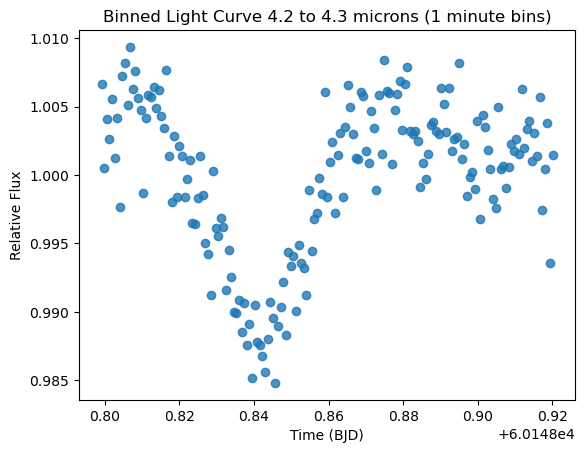

4.3
(431, 5726)
       time               flux       
------------------ ------------------
60148.799200587586 1.0085819406957524
 60148.79922176977  1.000622061813962
60148.799242951965 1.0104852556141413
 60148.79926413416 0.9988218247696308
60148.799285316345 1.0024936723299458
 60148.79930649854 1.0207165080155174
 60148.79932768073 0.9973266723832862
               ...                ...
 60148.92034154113 0.9807367152776557
 60148.92036272332 0.9843389812488922
 60148.92038390551 0.9760685815909352
 60148.92040508771 0.9891752995566494
 60148.92042626989 1.0110533794046748
 60148.92044745209 0.9870782090191371
 60148.92046863428 0.9956086208465524
Length = 5726 rows


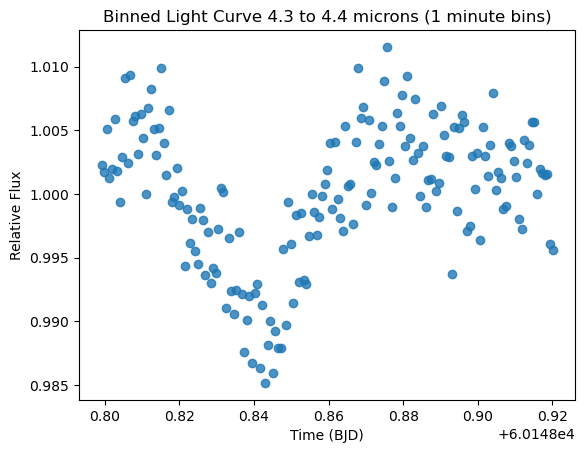

4.4
(431, 5726)
       time               flux       
------------------ ------------------
60148.799200587586 0.9833247548048891
 60148.79922176977 0.9843831134232354
60148.799242951965 0.9914735771695656
 60148.79926413416  0.959573738754151
60148.799285316345 0.9967072603047311
 60148.79930649854 1.0090295446387685
 60148.79932768073 0.9751061213702816
               ...                ...
 60148.92034154113 1.0128231955452827
 60148.92036272332 0.9800191046742699
 60148.92038390551 0.9753795497467374
 60148.92040508771  0.971975093425058
 60148.92042626989 1.0016405362984713
 60148.92044745209  1.001513833417622
 60148.92046863428 1.0040515728480206
Length = 5726 rows


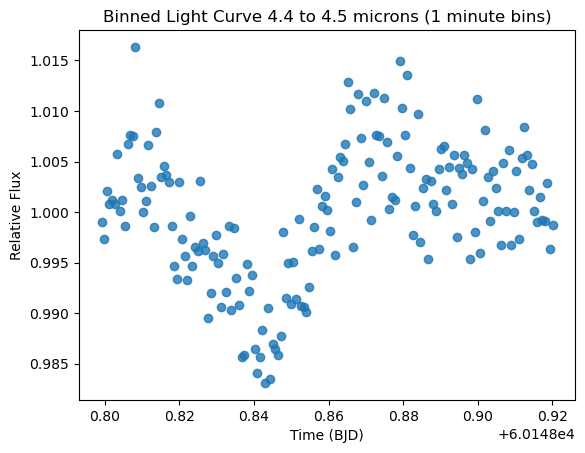

4.5
(431, 5726)
       time               flux       
------------------ ------------------
60148.799200587586 1.0196574645107763
 60148.79922176977  0.971162804071141
60148.799242951965  1.016896938749893
 60148.79926413416 0.9599300690865177
60148.799285316345 0.9914112346549002
 60148.79930649854 1.0803816071903989
 60148.79932768073 1.0068956836119147
               ...                ...
 60148.92034154113 0.9956101685763095
 60148.92036272332 0.9891592399285707
 60148.92038390551   0.99726399078179
 60148.92040508771 0.9837539374666747
 60148.92042626989   1.04677981411028
 60148.92044745209  0.989363131073507
 60148.92046863428 0.9954178487307423
Length = 5726 rows


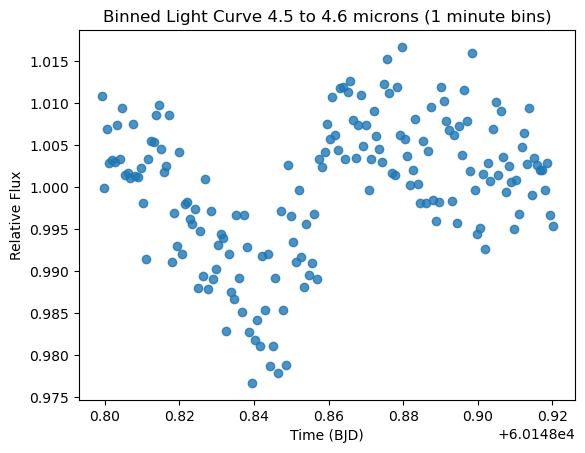

4.6
(431, 5726)
       time               flux       
------------------ ------------------
60148.799200587586 1.0022908168662592
 60148.79922176977 0.9689746237666172
60148.799242951965 1.0088921702251652
 60148.79926413416 0.9813926824636114
60148.799285316345 1.0039031174573398
 60148.79930649854  1.015054634926985
 60148.79932768073 1.0012801197740717
               ...                ...
 60148.92034154113 0.9711282133301352
 60148.92036272332 0.9907174659294272
 60148.92038390551 1.0150603877622457
 60148.92040508771 0.9588970677706669
 60148.92042626989  1.041697399743403
 60148.92044745209 0.9928042291350662
 60148.92046863428 0.9878678503947232
Length = 5726 rows


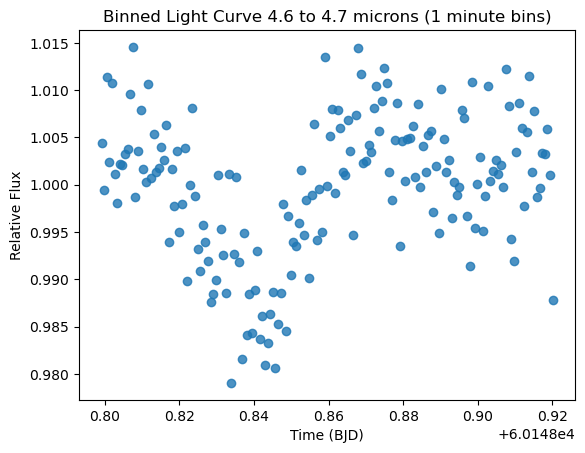

4.7
(431, 5726)
       time               flux       
------------------ ------------------
60148.799200587586 1.0240368042429289
 60148.79922176977 0.9859177130659988
60148.799242951965  0.998807983091238
 60148.79926413416  0.987959606429018
60148.799285316345 1.0117959302230433
 60148.79930649854  1.016939753363029
 60148.79932768073 0.9800785836606538
               ...                ...
 60148.92034154113 0.9930753869182846
 60148.92036272332 0.9587803817387696
 60148.92038390551 0.9897122052499098
 60148.92040508771 0.9684798917045975
 60148.92042626989 1.0290360699535959
 60148.92044745209 0.9936708295303606
 60148.92046863428 1.0015015423045077
Length = 5726 rows


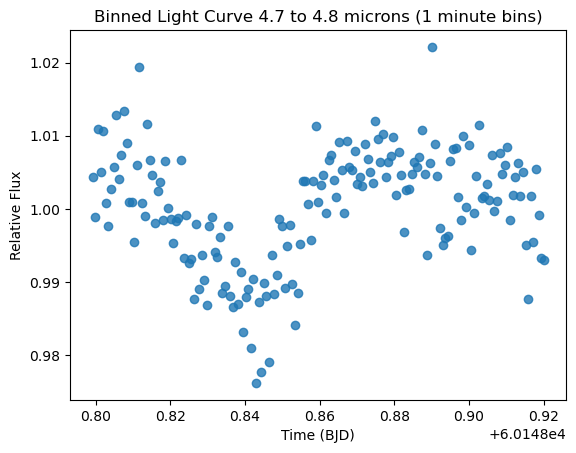

4.8
(431, 5726)
       time               flux       
------------------ ------------------
60148.799200587586 1.0158920103540463
 60148.79922176977 0.9847531588521172
60148.799242951965 1.0100137335323927
 60148.79926413416 0.9789830631263778
60148.799285316345 0.9808609833437385
 60148.79930649854 1.0212489484378544
 60148.79932768073 0.9801597736111276
               ...                ...
 60148.92034154113 0.9752369071414843
 60148.92036272332 0.9917628916506777
 60148.92038390551 0.9997270870527938
 60148.92040508771 0.9819377471826942
 60148.92042626989 1.0208705744539055
 60148.92044745209 0.9847055436066287
 60148.92046863428 1.0051167309682414
Length = 5726 rows


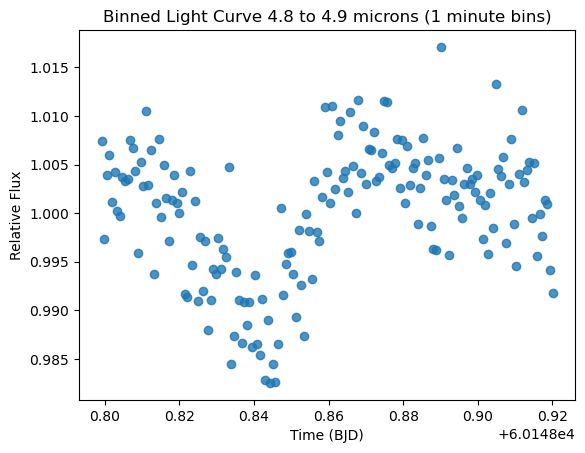

4.9
(431, 5726)
       time               flux       
------------------ ------------------
60148.799200587586 1.0048651596815654
 60148.79922176977 0.9783661615649178
60148.799242951965 0.9970644318766343
 60148.79926413416  0.995829480682886
60148.799285316345 0.9882097415563169
 60148.79930649854 1.0037807188636896
 60148.79932768073 0.9729252664957736
               ...                ...
 60148.92034154113 0.9701332333109107
 60148.92036272332 0.9988614106106423
 60148.92038390551   0.97467538751178
 60148.92040508771 0.9656816083032862
 60148.92042626989  1.013728581819288
 60148.92044745209 0.9798317605351488
 60148.92046863428 1.0039032951547417
Length = 5726 rows


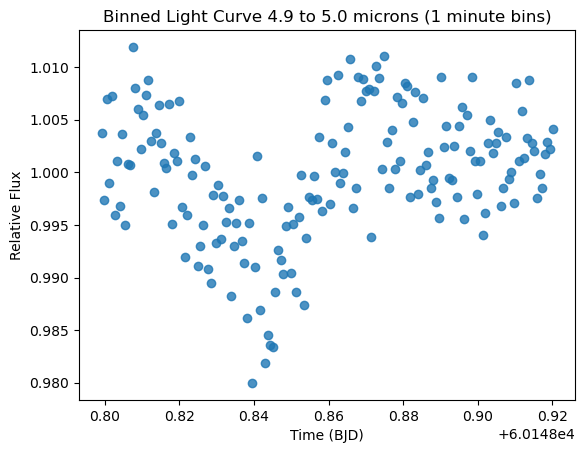

In [7]:
# PRODUCE LIGHT CURVES FOR EVERY 0.1 MICRONS UNTIL 5 MICRONS


for item in np.arange(0, 5, 0.1):
    item_rounded = round(item, 2)
    
    print(item_rounded)

    # Define wavelength range
    wavelength_min = item_rounded  # microns
    wavelength_max = 0.1 + item_rounded   # microns
    J_lc = np.zeros(len(time_array)) 


    # Extract flux values within the wavelength range
    print(fNewUnit.shape)

    for i in range(0,len(time_array)):
        wavelength_indices = np.where(np.logical_and(wNewUnit[:,i] >= wavelength_min, wNewUnit[:,i] <= wavelength_max))[0]
        flux_within_range = fNewUnit[wavelength_indices,i]
        J_lc[i] = np.median(flux_within_range)

    ### normalise the light curve to 1 
    norm = np.median(J_lc)
    J_lc = J_lc / norm


    # Binning (condensing data to obtain a clearer visual trend)

    # Convert time_array to astropy Time object
    time = Time(time_array, format='mjd', scale='tdb')

    # Create a TimeSeries object
    ts = TimeSeries(time=time, data={'flux':J_lc})
    print(ts)

    # Define the binning duration in minutes
    bin_width = 1  # minute

    # Perform binning
    binned_lc = aggregate_downsample(ts, time_bin_size=bin_width * u.minute, aggregate_func=np.median)

    # Extract binned time and flux values
    binned_time = binned_lc.time_bin_start.mjd
    binned_flux = binned_lc['flux']
    
    next_item = round(item + 0.1, 2)
    

    # Plot the binned light curve
    plt.scatter(binned_time, binned_flux, marker='o', linestyle='-', alpha=0.8)
    plt.xlabel("Time (BJD)")
    plt.ylabel("Relative Flux")
    plt.title(f"Binned Light Curve {item_rounded} to {next_item} microns (1 minute bins)")
    #plt.savefig("binned_light_curve_1_min_{item}_to_{item+1}.png")
    plt.show()